In [55]:
# ridge regression with scaling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score

X_train = pd.read_csv("data/standard_train_features.csv")
y_train = pd.read_csv("data/train_labels.csv")
X_test = pd.read_csv("data/standard_test_features.csv")
y_test = pd.read_csv("data/test_labels.csv").to_numpy()

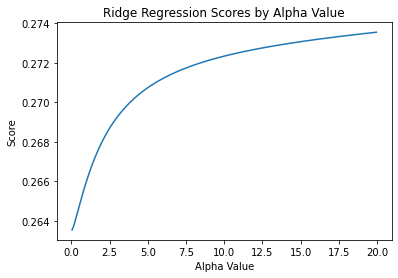

In [56]:
alphas = np.arange(0.05, 20, 0.1)
scores = np.empty(alphas.shape[0])
for i in range(alphas.shape[0]):
    clf = Ridge(alpha=alphas[i])
    clf.fit(X_train, y_train)
    scores[i] = clf.score(X_test, y_test)
    
plt.title("Ridge Regression Scores by Alpha Value")
plt.xlabel("Alpha Value")
plt.ylabel("Score")
plt.plot(alphas, scores)
plt.show()

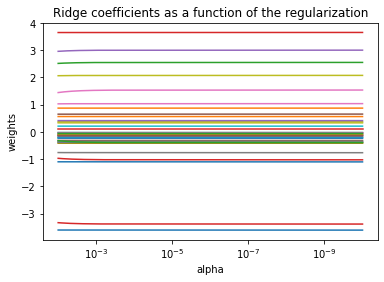

In [57]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_[0])

# #############################################################################
# Display results

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

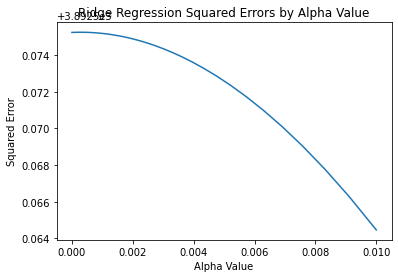

In [58]:
if (not isinstance(X_train, np.ndarray)):
    X_train = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1])
if (not isinstance(X_test, np.ndarray)):
    X_test = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1])
if (not isinstance(y_train, np.ndarray)):
    y_train = y_train.to_numpy().reshape(y_train.shape[0], y_train.shape[1])
if (not isinstance(y_test, np.ndarray)):
    y_test = y_test.to_numpy().reshape(y_test.shape[0], y_test.shape[1])
errors = np.zeros(alphas.shape[0])
for i in range(alphas.shape[0]):
    clf = Ridge(alpha=alphas[i])
    clf.fit(X_train, y_train)
    for j in range(X_test.shape[0]):
        errors[i] += (clf.predict(X_test[j, :].reshape(1, -1)) - y_test[j])**2
    
plt.title("Ridge Regression Squared Errors by Alpha Value")
plt.xlabel("Alpha Value")
plt.ylabel("Squared Error")
plt.plot(alphas, errors)
plt.show()

In [65]:
clf = Ridge(alpha=0.2)
clf.fit(X_train, y_train)
count = 0
y_pred = []
y_ground = []
for i in range(X_test.shape[0]):
    pred = clf.predict(X_test[i, :].reshape(1, -1))
    if (pred <= 8 and y_test[i] <= 8):
        count += 1
    elif (pred > 8 and y_test[i] > 8):
        count += 1
    if (pred <= 8):
        y_pred.append(0)
    else:
        y_pred.append(1)
    if (y_test[i] <= 8):
        y_ground.append(0)
    else:
        y_ground.append(1)
print("accuracy: " + str(float(count) / X_test.shape[0]))
print("f-score: " + str(f1_score(y_ground, y_pred, average='weighted')))

accuracy: 0.7458100558659218
f-score: 0.7199940689424914


In [67]:
clf = Ridge(alpha=0.5)
clf.fit(X_train, y_train)
count = 0
y_pred = []
y_ground = []
for i in range(X_test.shape[0]):
    pred = clf.predict(X_test[i, :].reshape(1, -1))
    if (pred <= 4 and y_test[i] <= 4):
        count += 1
    elif (pred > 4 and pred <= 8 and y_test[i] > 4 and y_test[i] <= 8):
        count += 1
    elif (pred > 8 and pred <= 12 and y_test[i] > 8 and y_test[i] <= 12):
        count += 1
    elif (pred > 12 and y_test[i] > 12):
        count += 1
    if (pred <= 4):
        y_pred.append(0)
    elif (pred <= 8):
        y_pred.append(1)
    elif (pred <= 12):
        y_pred.append(2)
    else:
        y_pred.append(3)
    if (y_test[i] <= 4):
        y_ground.append(0)
    elif (y_test[i] <= 8):
        y_ground.append(1)
    elif (y_test[i] <= 12):
        y_ground.append(2)
    else:
        y_ground.append(3)
print("accuracy: " + str(float(count) / X_test.shape[0]))
print("f-score: " + str(f1_score(y_ground, y_pred, average='weighted')))

accuracy: 0.43854748603351956
f-score: 0.4412459382689648


In [68]:
clf = Ridge(alpha=0.5)
clf.fit(X_train, y_train)
count = 0
y_pred = []
y_ground = []
for i in range(X_test.shape[0]):
    pred = clf.predict(X_test[i, :].reshape(1, -1))
    if (pred <= 1 and y_test[i] <= 1):
        count += 1
    elif (pred > 1 and pred <= 2 and y_test[i] > 1 and y_test[i] <= 2):
        count += 1
    elif (pred > 2 and pred <= 3 and y_test[i] > 2 and y_test[i] <= 3):
        count += 1
    elif (pred > 3 and pred <= 4 and y_test[i] > 3 and y_test[i] <= 4):
        count += 1
    elif (pred > 4 and pred <= 5 and y_test[i] > 4 and y_test[i] <= 5):
        count += 1
    elif (pred > 5 and pred <= 6 and y_test[i] > 5 and y_test[i] <= 6):
        count += 1
    elif (pred > 6 and pred <= 7 and y_test[i] > 6 and y_test[i] <= 7):
        count += 1
    elif (pred > 7 and pred <= 8 and y_test[i] > 7 and y_test[i] <= 8):
        count += 1
    elif (pred > 8 and pred <= 9 and y_test[i] > 8 and y_test[i] <= 9):
        count += 1
    elif (pred > 9 and pred <= 10 and y_test[i] > 9 and y_test[i] <= 10):
        count += 1
    elif (pred > 10 and pred <= 11 and y_test[i] > 10 and y_test[i] <= 11):
        count += 1
    elif (pred > 11 and pred <= 12 and y_test[i] > 11 and y_test[i] <= 12):
        count += 1
    elif (pred > 12 and pred <= 13 and y_test[i] > 12 and y_test[i] <= 13):
        count += 1
    elif (pred > 13 and pred <= 14 and y_test[i] > 13 and y_test[i] <= 14):
        count += 1
    elif (pred > 14 and pred <= 15 and y_test[i] > 14 and y_test[i] <= 15):
        count += 1
    elif (pred > 15 and y_test[i] > 15):
        count += 1
    if (pred <= 1):
        y_pred.append(0)
    elif (pred <= 2):
        y_pred.append(1)
    elif (pred <= 3):
        y_pred.append(2)
    elif (pred <= 4):
        y_pred.append(3)
    elif (pred <= 5):
        y_pred.append(4)
    elif (pred <= 6):
        y_pred.append(5)
    elif (pred <= 7):
        y_pred.append(6)
    elif (pred <= 8):
        y_pred.append(7)
    elif (pred <= 9):
        y_pred.append(8)
    elif (pred <= 10):
        y_pred.append(9)
    elif (pred <= 11):
        y_pred.append(10)
    elif (pred <= 12):
        y_pred.append(11)
    elif (pred <= 13):
        y_pred.append(12)
    elif (pred <= 14):
        y_pred.append(13)
    elif (pred <= 15):
        y_pred.append(14)
    else:
        y_pred.append(15)
    if (y_test[i] <= 1):
        y_ground.append(0)
    elif (y_test[i] <= 2):
        y_ground.append(1)
    elif (y_test[i] <= 3):
        y_ground.append(2)
    elif (y_test[i] <= 4):
        y_ground.append(3)
    elif (y_test[i] <= 5):
        y_ground.append(4)
    elif (y_test[i] <= 6):
        y_ground.append(5)
    elif (y_test[i] <= 7):
        y_ground.append(6)
    elif (y_test[i] <= 8):
        y_ground.append(7)
    elif (y_test[i] <= 9):
        y_ground.append(8)
    elif (y_test[i] <= 10):
        y_ground.append(9)
    elif (y_test[i] <= 11):
        y_ground.append(10)
    elif (y_test[i] <= 12):
        y_ground.append(11)
    elif (y_test[i] <= 13):
        y_ground.append(12)
    elif (y_test[i] <= 14):
        y_ground.append(13)
    elif (y_test[i] <= 15):
        y_ground.append(14)
    else:
        y_ground.append(15)
print("accuracy: " + str(float(count) / X_test.shape[0]))
print("f-score: " + str(f1_score(y_ground, y_pred, average='weighted')))

accuracy: 0.11452513966480447
f-score: 0.09798019420784534


In [24]:
class Regression(object):
    
    def __init__(self):
        pass
    
    def rmse(self, pred, label): # [5pts]
        '''
        This is the root mean square error.
        Args:
            pred: numpy array of length N x 1, the prediction of labels
            label: numpy array of length N x 1, the ground truth of labels
        Return:
            a float value
        '''
        mse = 0.0
        for i in range(pred.shape[0]):
            mse += (pred[i] - label[i])**2
        mse = mse / pred.shape[0]
        rmse = mse**(1/2)
        return rmse
    
    def construct_polynomial_feats(self, x, degree): # [5pts]
        """
        Args:
            x: numpy array of length N, the 1-D observations
            degree: the max polynomial degree
        Return:
            feat: numpy array of shape Nx(degree+1), remember to include 
            the bias term. feat is in the format of:
            [[1.0, x1, x1^2, x1^3, ....,],
             [1.0, x2, x2^2, x2^3, ....,],
             ......
            ]
        """
        N = x.shape[0]
        feat = np.zeros((N, degree + 1))
        for i in range(N):
            for j in range(degree + 1):
                feat[i][j] = x[i]**j
        return feat

    def predict(self, xtest, weight): # [5pts]
        """
        Args:
            xtest: NxD numpy array, where N is number 
                   of instances and D is the dimensionality of each 
                   instance
            weight: Dx1 numpy array, the weights of linear regression model
        Return:
            prediction: Nx1 numpy array, the predicted labels
        """
        prediction = np.matmul(xtest, weight)
        return prediction

    # =================
    # RIDGE REGRESSION
        
    def ridge_fit_closed(self, xtrain, ytrain, c_lambda): # [5pts]
        """
        Args:
            xtrain: N x D numpy array, where N is number of instances and D is the dimensionality of each instance
            ytrain: N x 1 numpy array, the true labels
            c_lambda: floating number
        Return:
            weight: Dx1 numpy array, the weights of ridge regression model
        """
        identity = np.identity(xtrain.shape[1])
        identity[0][0] = 0
        weight = np.matmul(xtrain.T, xtrain) + (c_lambda * identity)
        weight = np.matmul(np.linalg.inv(weight), xtrain.T)
        weight = np.matmul(weight, ytrain)
        return weight
        
    def ridge_fit_GD(self, xtrain, ytrain, c_lambda, epochs=500, learning_rate=1e-7): # [5pts]
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytrain: Nx1 numpy array, the true labels
            c_lambda: floating number
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        # get shape
        N = xtrain.shape[0]
        D = xtrain.shape[1]
        
        weight = np.zeros((D, 1))
        for i in range(epochs):
            gradient = np.matmul(xtrain, weight)
            gradient = (-1 * np.matmul(xtrain.T, ytrain - gradient)) + (c_lambda * weight)
            weight = weight - ((1/N) * learning_rate * gradient)
        return weight

    def ridge_fit_SGD(self, xtrain, ytrain, c_lambda, epochs=100, learning_rate=0.001): # [5pts]
        """
        Args:
            xtrain: NxD numpy array, where N is number 
                    of instances and D is the dimensionality of each 
                    instance
            ytrain: Nx1 numpy array, the true labels
        Return:
            weight: Dx1 numpy array, the weights of linear regression model
        """
        # get shape
        N = xtrain.shape[0]
        D = xtrain.shape[1]
        
        weight = np.zeros((D, 1))
        for i in range(epochs):
            for j in range(N):
                gradient = np.matmul(xtrain[j], weight).reshape((1, 1))
                gradient = (-1 * np.matmul(xtrain[j].T.reshape((D, 1)), ytrain[j] - gradient)) + (c_lambda * (1/N) * weight)
                weight = weight - learning_rate * gradient
        return weight

In [6]:
#helper do not need to change
def plot_curve(x, y, curve_type='.', color='b', lw=2):
    plt.plot(x, y, curve_type, color=color, linewidth=lw)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

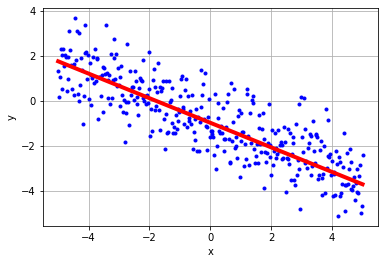

In [12]:
#helper, do not need to change
POLY_DEGREE = 5
NUM_OBS = 358

rng = np.random.RandomState(seed=4)

true_weight = -rng.rand(POLY_DEGREE + 1, 1)
true_weight[2:, :] = 0
x_all = np.linspace(-5, 5, NUM_OBS)
reg = Regression()
x_all_feat = reg.construct_polynomial_feats(x_all, POLY_DEGREE)
y_all = np.dot(x_all_feat, true_weight) + rng.randn(x_all_feat.shape[0], 1) # in the second term, we add noise to data
# Note that here we try to produce y_all as our training data
plot_curve(x_all, y_all) # Data with noise that we are going to predict
plot_curve(x_all, np.dot(x_all_feat, true_weight), curve_type='-', color='r', lw=4) # the groundtruth information
plt.show()

indices = rng.permutation(NUM_OBS)

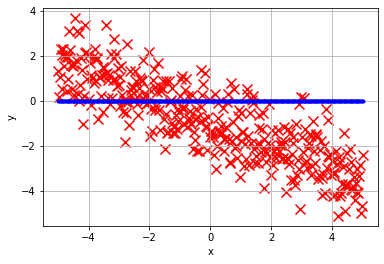

test rmse: 6.5247


In [13]:
#helper, do not need to change
weight = reg.ridge_fit_GD(X_train, y_train, c_lambda=1000, learning_rate=1e-7)
y_pred = reg.predict(X_test, weight)
plot_curve(x_all, y_pred)
plt.scatter(x_all, y_all, s=100, c='r', marker='x')
plt.show()

y_test_pred = reg.predict(X_test, weight)
test_rmse = reg.rmse(y_test_pred, y_test)
print('test rmse: %.4f' % test_rmse)